In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv", index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [9]:
(df==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.Sales.value_counts()

Sales
9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: count, Length: 121, dtype: int64

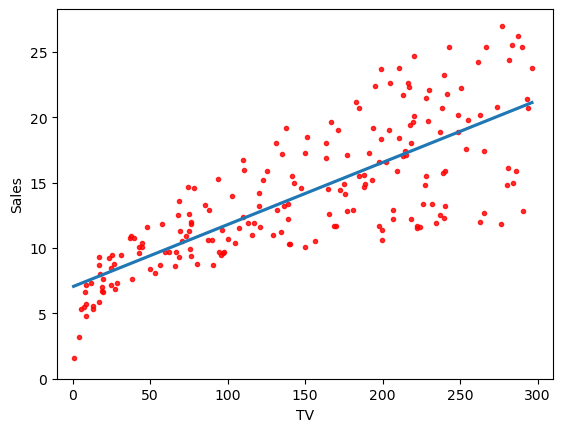

In [11]:
sns.regplot(x='TV', y='Sales', data=df, order=1, ci=None, scatter_kws={'color':'r','s':9})
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

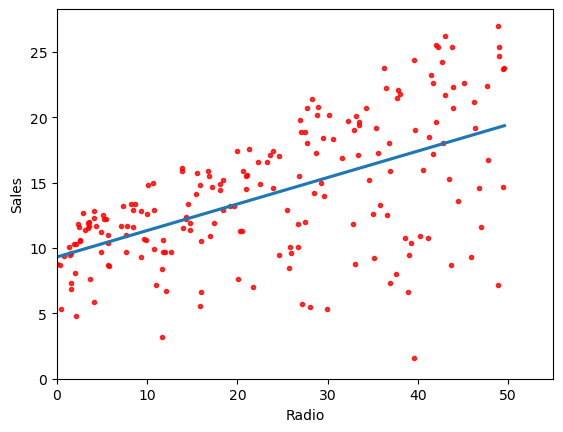

In [12]:
sns.regplot(x='Radio', y='Sales', data=df, order=1, ci=None, scatter_kws={'color':'r','s':9})
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

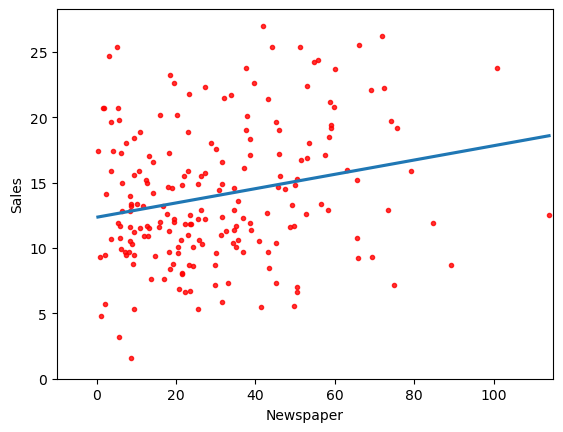

In [13]:
sns.regplot(x='Newspaper', y='Sales', data=df, order=1, ci=None, scatter_kws={'color':'r','s':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

# scaling the data

In [14]:
from sklearn.preprocessing import scale
X=scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
Y = df.Sales


In [15]:
X.mean()

1.0089706847793422e-14

In [16]:
X.std()

85.63933175679269

# Data Modelling

In [17]:
import sklearn.linear_model as skl_lm

In [18]:
regr=skl_lm.LinearRegression()


In [19]:
regr.fit(X,Y)

LinearRegression()

In [20]:
regr.intercept_

14.0225

In [21]:
regr.coef_

array([0.04753664])

In [22]:
min_rss = np.sum((regr.intercept_+regr.coef_*X-Y.values.reshape(-1,1)**2))

In [23]:
min_rss

-41938.75

In [24]:
regr = skl_lm.LinearRegression()




In [25]:
X= df.TV.values.reshape(-1,1)


In [26]:
Y = df.Sales

In [27]:
regr.fit(X,Y)

LinearRegression()

In [28]:
regr.coef_

array([0.04753664])

In [29]:
min_rss = np.sum((regr.intercept_+regr.coef_*X-Y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [30]:
mse=min_rss/len(Y)
mse

10.512652915656757

# r-square

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)

In [32]:
r2_score(Y, Sales_pred)

0.611875050850071

In [33]:
mean_squared_error(Y,Sales_pred)

10.512652915656757

# statsmodels

In [34]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.47e-42
Time:                        20:44:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [36]:
((df.Sales-(est.params[0]+est.params[1]*df.TV))**2).sum()

2102.5305831313512

In [37]:
((df.Sales-(est.params[0]+est.params[1]*df.TV))**2).sum()/len(df.Sales)

10.512652915656757

In [38]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.58e-96
Time:                        20:44:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
est = smf.ols('Sales~Newspaper',df).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


# Multiple Linear regression

In [40]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.58e-96
Time:                        20:44:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [42]:
X = df.drop(columns='Sales')
Y =df[['Sales']]

In [43]:
X.head()


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

In [45]:
xtrain.shape


(150, 3)

In [46]:
xtest.shape

(50, 3)

In [47]:
ytrain.shape

(150, 1)

In [48]:
ytest.shape

(50, 1)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [52]:
dct = {
    'Linear' : LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor(),
    'GradientBoosting' : GradientBoostingRegressor(),
    'XGBoost' : XGBRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR' : SVR()
}

In [53]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
train_cv = []

for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mse_train = mean_squared_error(ytrain,ypred_train) 
    mse_test = mean_squared_error(ytest,ypred_test)
    r2_train = r2_score(ytrain,ypred_train)
    r2_test =r2_score(ytest,ypred_test)
   
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error')
    score = scores.mean()
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    train_cv.append(score)
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print(f'CV:{train_cv}')
    print("===============================")

Scores for Linear
Training Scores
MSE:[2.8831737664103447]
R2:[0.8851029461177776]
Testing Scores
MSE:[2.5577820543721854]
R2:[0.9219136041031583]
CV:[-3.1452060032104265]
Scores for DecisionTree
Training Scores
MSE:[2.8831737664103447, 0.0]
R2:[0.8851029461177776, 1.0]
Testing Scores
MSE:[2.5577820543721854, 1.8332]
R2:[0.9219136041031583, 0.9440343321224738]
CV:[-3.1452060032104265, -2.4348]


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Scores for RandomForest
Training Scores
MSE:[2.8831737664103447, 0.0, 0.08957561999999865]
R2:[0.8851029461177776, 1.0, 0.9964303314085411]
Testing Scores
MSE:[2.5577820543721854, 1.8332, 0.7154870799999933]
R2:[0.9219136041031583, 0.9440343321224738, 0.9781569319823584]
CV:[-3.1452060032104265, -2.4348, -0.7375997933333318]


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Scores for GradientBoosting
Training Scores
MSE:[2.8831737664103447, 0.0, 0.08957561999999865, 0.02947397191125996]
R2:[0.8851029461177776, 1.0, 0.9964303314085411, 0.9988254358518851]
Testing Scores
MSE:[2.5577820543721854, 1.8332, 0.7154870799999933, 0.45683033960556335]
R2:[0.9219136041031583, 0.9440343321224738, 0.9781569319823584, 0.9860534502167017]
CV:[-3.1452060032104265, -2.4348, -0.7375997933333318, -0.490167157141728]
Scores for XGBoost
Training Scores
MSE:[2.8831737664103447, 0.0, 0.08957561999999865, 0.02947397191125996, 1.463202985617796e-06]
R2:[0.8851029461177776, 1.0, 0.9964303314085411, 0.9988254358518851, 0.999999941690052]
Testing Scores
MSE:[2.5577820543721854, 1.8332, 0.7154870799999933, 0.45683033960556335, 0.46957374903626786]
R2:[0.9219136041031583, 0.9440343321224738, 0.9781569319823584, 0.9860534502167017, 0.9856644073300411]
CV:[-3.1452060032104265, -2.4348, -0.7375997933333318, -0.490167157141728, -0.639514434935767]
Scores for KNN
Training Scores
MSE:[2.88

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam